# Transformation of Variables

 ### Example: Bacteria Deaths due to X-Ray radiation data

### 1-1.  Loading data-set

In [2]:
# Table 6.2 Number of surviving Bacteria Data

dat <- read.table("bacteria.txt",header=T)
head(dat)
tail(dat)
dim(dat)

t,N_t
1,355
2,211
3,197
4,166
5,142
6,106


,t,N_t
10,10,38
11,11,36
12,12,32
13,13,21
14,14,19
15,15,15


[1] 15  2

### 1-2. Multiple Linear Regression (168 page)

nt = β0 + β1t + εt (6.7)

In [3]:
# linear model fit
attach(dat)
res_lm <- lm(N_t ~ t)
summary(res_lm)


Call:
lm(formula = N_t ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.867 -23.599  -9.652  10.223 114.883 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   259.58      22.73  11.420 3.78e-08 ***
t             -19.46       2.50  -7.786 3.01e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.83 on 13 degrees of freedom
Multiple R-squared:  0.8234,	Adjusted R-squared:  0.8098 
F-statistic: 60.62 on 1 and 13 DF,  p-value: 3.006e-06


Figure 6.5 Plot of nt against time t

Figure 6.6 Plot of the standardized residuals from (6.7) against time t (169 page)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


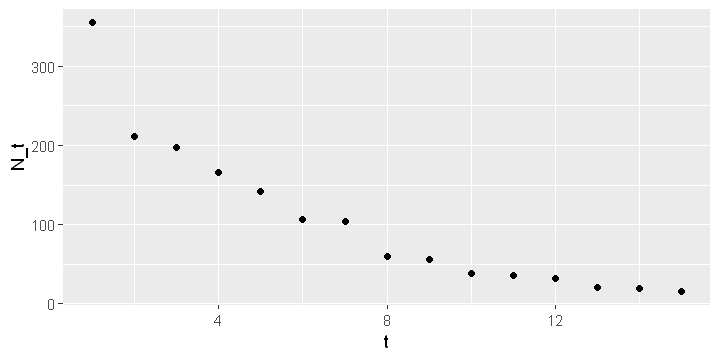

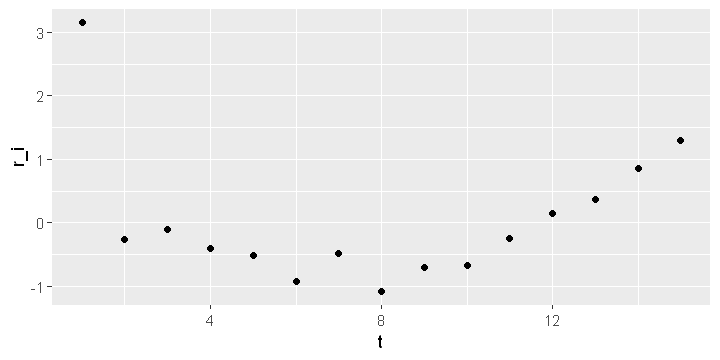

In [4]:
# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

library(ggplot2)
ggplot(dat, aes(x = t, y = N_t)) + geom_point()

# residual plot
res.dat <- cbind(dat, rstandard(res_lm))
colnames(res.dat)[c(3)] <- "r_i"

ggplot(res.dat, aes(x = t, y = r_i)) + geom_point()

### 1-3. Logarithmic Transformation

ln(nt) = β0 + β1t + εt

In [5]:
# linear model fit
res_ln_lm <- lm(log(N_t) ~ t)
summary(res_ln_lm)


Call:
lm(formula = log(N_t) ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18445 -0.06189  0.01253  0.05201  0.20021 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.973160   0.059778   99.92  < 2e-16 ***
t           -0.218425   0.006575  -33.22 5.86e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.11 on 13 degrees of freedom
Multiple R-squared:  0.9884,	Adjusted R-squared:  0.9875 
F-statistic:  1104 on 1 and 13 DF,  p-value: 5.86e-14


Figure 6.8 Plot of the standardized residuals against time t after transformation (171
page)

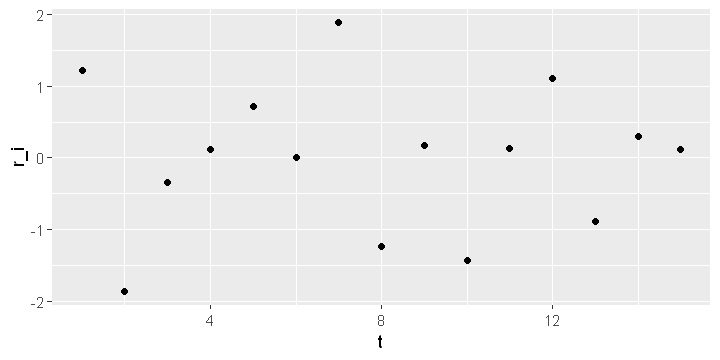

In [6]:
# residual plot
res.dat_ln <- cbind(dat, rstandard(res_ln_lm))
colnames(res.dat_ln)[c(3)] <- "r_i"

ggplot(res.dat_ln, aes(x = t, y = r_i)) + geom_point()

### Example: Injury Incidents in Airlines data

### 2-1. Loading data-set

In [8]:
# Table 6.6 Number of Injury Incidents Y and Proportion of Total Flights N

dat <- read.table("airlines.txt",header=T)
head(dat)
tail(dat)
dim(dat)

Y,N
11,0.0950
7,0.1920
7,0.0750
19,0.2078
9,0.1382
4,0.0540


,Y,N
4,19,0.2078
5,9,0.1382
6,4,0.0540
7,3,0.1292
8,1,0.0503
9,3,0.0629


[1] 9 2

Figure 6.10 Plot of Y against N (174 page)

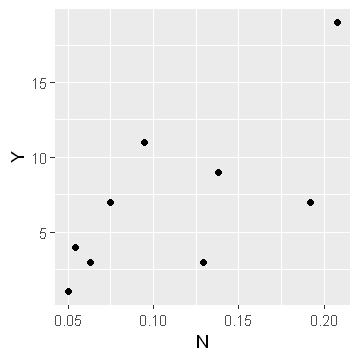

In [9]:
# plot size
options(repr.plot.width = 3, repr.plot.height = 3)

ggplot(dat, aes(x = N, y = Y)) + geom_point()

### Multiple Linear Regression (173 page)

yi = β0 + β1ni + εi

In [10]:
# linear model fit
attach(dat)
res_lm <- lm(Y ~ N)
summary(res_lm)


Call:
lm(formula = Y ~ N)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3351 -2.1281  0.1605  2.2670  5.6382 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.1402     3.1412  -0.045   0.9657  
N            64.9755    25.1959   2.579   0.0365 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.201 on 7 degrees of freedom
Multiple R-squared:  0.4872,	Adjusted R-squared:  0.4139 
F-statistic:  6.65 on 1 and 7 DF,  p-value: 0.03654


In [11]:
# Table 6.7 Estimated Regression coefficients (174 page)
summary(res_lm)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.1401521,3.141233,-0.0446169,0.96565877
N,64.9754768,25.195869,2.5788147,0.03653538


In [12]:
cat("R2=", round(summary(res_lm)$r.squared, 3),
    ", sigma=" , round(summary(res_lm)$sigma,3),
    ", df=" , summary(res_lm)$df[2])

R2= 0.487 , sigma= 4.201 , df= 7

√yi = β′0 + β′1ni + εi (6.8)

In [13]:
res_root_lm <- lm(sqrt(Y) ~ N)
summary(res_root_lm)


Call:
lm(formula = sqrt(Y) ~ N)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9690 -0.7655  0.1906  0.5874  1.0211 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1.1692     0.5783   2.022   0.0829 .
N            11.8564     4.6382   2.556   0.0378 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7733 on 7 degrees of freedom
Multiple R-squared:  0.4828,	Adjusted R-squared:  0.4089 
F-statistic: 6.535 on 1 and 7 DF,  p-value: 0.03776


Figure 6.12 Plot of the standardized residuals from the gression of root(y_i) on n_i
(175 page)

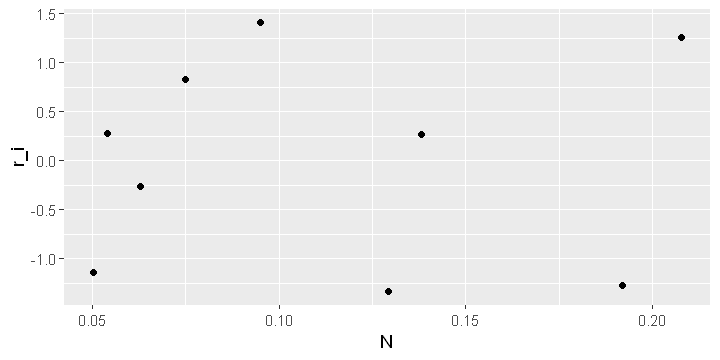

In [15]:
# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

# residual plot
res.dat_root <- cbind(dat, rstandard(res_root_lm))
colnames(res.dat_root)[c(3)] <- "r_i"

ggplot(res.dat_root, aes(x = N, y = r_i)) + geom_point()

### Example: Industrial Establishments data

### 3-1. Loading data-set

In [16]:
# Table 6.9 Number of Supervised Workers and Supervisors in 27 Industrial Establishments
dat <- read.table("industry.txt",header=T)
head(dat)
tail(dat)
dim(dat)

X,Y
294,30
247,32
267,37
358,44
423,47
311,49


,X,Y
22,1025,160
23,1021,97
24,1200,180
25,1250,112
26,1500,210
27,1650,135


[1] 27  2

Figure 6.13 Numer of supervisors (Y ) versus number supervised (X) (177 page)

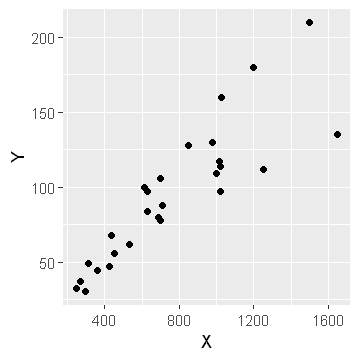

In [17]:
# plot size
options(repr.plot.width = 3, repr.plot.height = 3)

ggplot(dat, aes(x = X, y = Y)) + geom_point()

### 3-2. Multiple Linear Regression (176 page)

yi = β0 + β1xi + εi (6.9)

In [18]:
# linear model fit
attach(dat)
res_lm <- lm(Y ~ X)
summary(res_lm)

The following object is masked from dat (pos = 3):

    Y




Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.294  -9.298  -5.579  14.394  39.119 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.44806    9.56201   1.511    0.143    
X            0.10536    0.01133   9.303 1.35e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.73 on 25 degrees of freedom
Multiple R-squared:  0.7759,	Adjusted R-squared:  0.7669 
F-statistic: 86.54 on 1 and 25 DF,  p-value: 1.35e-09


Figure 6.14 (177 page)

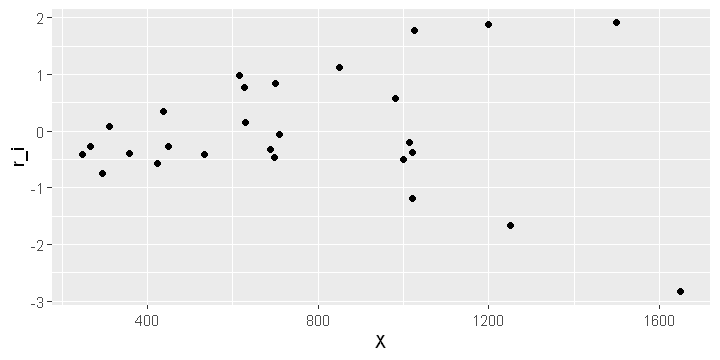

In [19]:
# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

# residual plot
res.dat <- cbind(dat, rstandard(res_lm))
colnames(res.dat)[c(3)] <- "r_i"

ggplot(res.dat, aes(x = X, y = r_i)) + geom_point()

### 3-3. Removerl of Heteroscedasticity

In [20]:
dat$Y_new <- dat$Y / dat$X
dat$X_new <- 1 / dat$X

In [21]:
# linear model fit
res_lm_new <- lm(Y_new ~ X_new,data=dat)
summary(res_lm_new)


Call:
lm(formula = Y_new ~ X_new, data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041477 -0.013852 -0.004998  0.024671  0.035427 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.120990   0.008999  13.445 6.04e-13 ***
X_new       3.803296   4.569745   0.832    0.413    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02266 on 25 degrees of freedom
Multiple R-squared:  0.02696,	Adjusted R-squared:  -0.01196 
F-statistic: 0.6927 on 1 and 25 DF,  p-value: 0.4131


### 3-4.  Logarithmic transformation of data (180 page)

ln(yi) = β0 + β1xi + εi (6.16)

In [22]:
# linear model fit
res_ln_lm <- lm(log(Y) ~ X, data=dat)
summary(res_ln_lm)


Call:
lm(formula = log(Y) ~ X, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59648 -0.16578  0.00244  0.17481  0.34964 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.5150232  0.1110670  31.648  < 2e-16 ***
X           0.0012041  0.0001316   9.153 1.85e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2524 on 25 degrees of freedom
Multiple R-squared:  0.7702,	Adjusted R-squared:  0.761 
F-statistic: 83.77 on 1 and 25 DF,  p-value: 1.855e-09


Figure 6.17 (181 page)

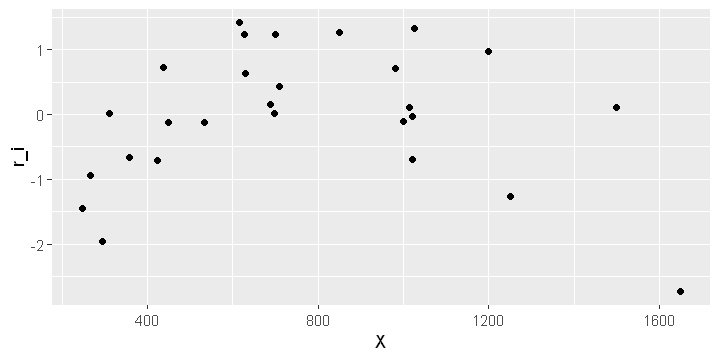

In [23]:
# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

# residual plot
res.dat <- cbind(dat, rstandard(res_ln_lm))
colnames(res.dat)[c(5)] <- "r_i"

ggplot(res.dat, aes(x = X, y = r_i)) + geom_point()

ln(yi) = β0 + β1xi + β2x^2i + εi (6.17)

In [24]:
# linear model fit
dat$X2 <- dat$X^2

res_ln_lm_2 <- lm(log(Y) ~ X + X2, data=dat)
summary(res_ln_lm_2)


Call:
lm(formula = log(Y) ~ X + X2, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30589 -0.11705 -0.02707  0.17593  0.30657 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.852e+00  1.566e-01  18.205 1.50e-15 ***
X            3.113e-03  3.989e-04   7.803 4.90e-08 ***
X2          -1.102e-06  2.238e-07  -4.925 5.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1817 on 24 degrees of freedom
Multiple R-squared:  0.8857,	Adjusted R-squared:  0.8762 
F-statistic: 92.98 on 2 and 24 DF,  p-value: 4.976e-12


Figure 6.18 (182 page)

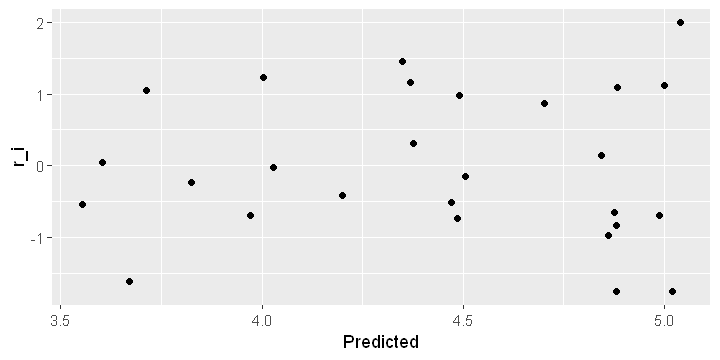

In [25]:
# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

# residual plot
res.dat <- cbind(dat, rstandard(res_ln_lm_2), predict(res_ln_lm_2))
colnames(res.dat)[c(6,7)] <- c("r_i", "Predicted")

ggplot(res.dat, aes(x = Predicted, y = r_i)) + geom_point()

Figure 6.19 (182 page)

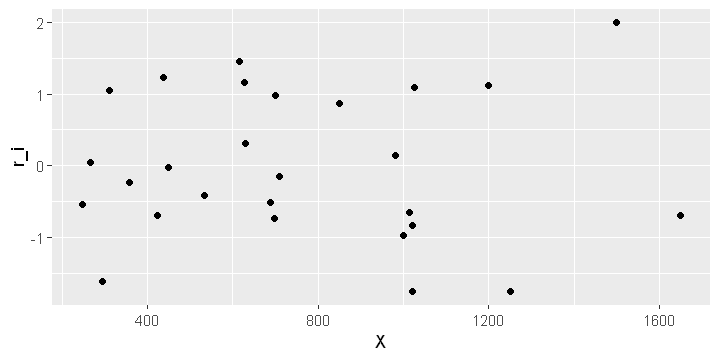

In [26]:
# residual plot
ggplot(res.dat, aes(x = X, y = r_i)) + geom_point()

Figure 6.20 (183 page)

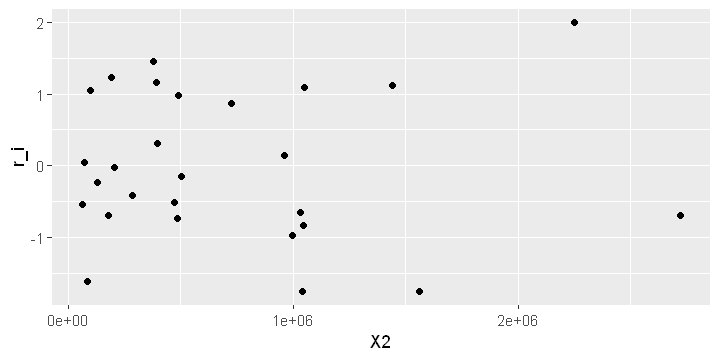

In [27]:
#residual plot
ggplot(res.dat, aes(x = X2, y = r_i)) + geom_point()